In [1]:
#importing the requirede libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# K-Fold Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier

<H2>EDA<H2>

In [37]:
#Loding csv file
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\customer.csv")

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
print("dataset shape  : ",df.shape)
print("dataset rows   : ",df.shape[0])
print("dataset columns: ",df.shape[1])
print("dataset size   : ",df.size)
print(df.info())

dataset shape  :  (7043, 21)
dataset rows   :  7043
dataset columns:  21
dataset size   :  147903
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   obje

In [40]:
print('Lets have a look at our target variable Churn :')
print(df['Churn'].value_counts())

Lets have a look at our target variable Churn :
No     5174
Yes    1869
Name: Churn, dtype: int64


In [41]:
#Check for missing values
print(df.isnull().sum())
print()
print("No missing values found",df.isnull().sum().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No missing values found 0


In [42]:
#Analysing the Data

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#removing the NaN value rows
#Not attempting to fill it as null values are a small percentage of the whole data
df=df.dropna()
df.drop('customerID', axis=1, inplace=True)

#Changing the SeniorCitizen data to object type
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
#Extracting the list of columns that are num or string seprately
num_vars=df.columns[df.dtypes!='object']
str_vars=df.columns[df.dtypes=='object']

<H3>Visualizing the data<H3>

In [13]:
#Fuhnction to annotate percentage on count plot

def percentageplot(ax,total):
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    return ax

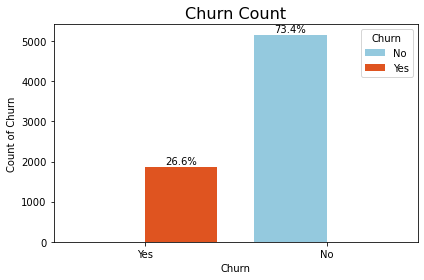

We observe that the data is not balanced, and should be balanced using SMOTE 


In [14]:
#Plottoing the target variable 

ax=sns.countplot(data=df,x='Churn',order=['Yes','No'],
                   hue='Churn',
                   palette=['skyblue','orangered'])
plt.ylabel('Count of Churn', size=10)
plt.title("Churn Count", size=16)
ax=percentageplot(ax,len(df))
plt.tight_layout()
plt.show()
print("We observe that the data is not balanced, and should be balanced using SMOTE ")

In [15]:
#Function to plot all the categorical independent variables with the target variable

def CategoricalDataAnalysisPlot(df,var,target_var):
    fig, ax =plt.subplots(1,2)
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.countplot(data=df,x=var,
                       hue=target_var,
                       palette=['skyblue','orangered'], ax=ax[0])
    ax[0].set(xlabel=var, ylabel='Count')
    percentageplot(ax[0],len(df))
    plt.tight_layout()

    sns.histplot(binwidth=0.5, x=var, hue=target_var,
                 data=df, stat="count", 
                 multiple="stack",
                 palette=['skyblue','orangered'],ax=ax[1])
    fig.tight_layout()
    plt.show()


gender


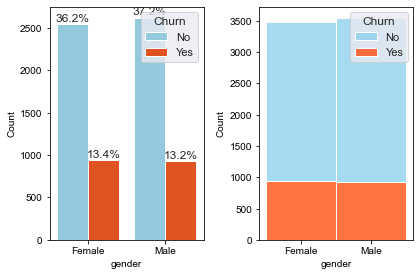

SeniorCitizen


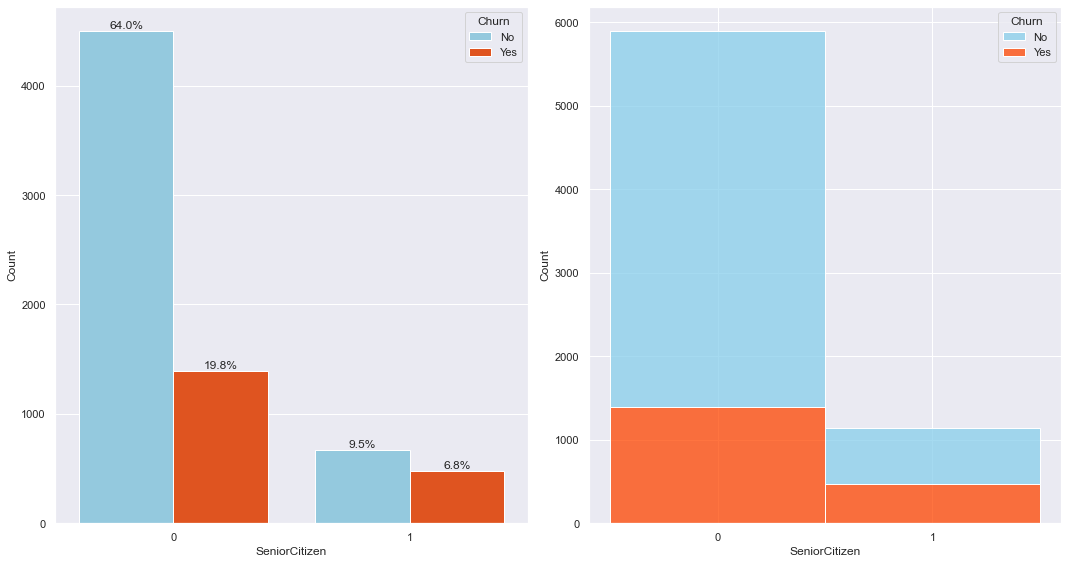

Partner


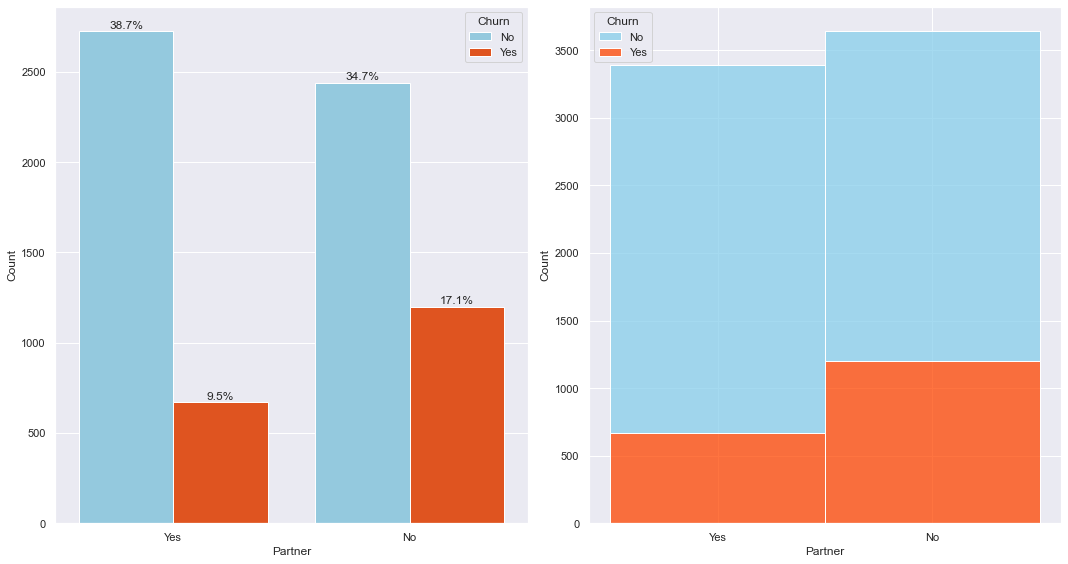

Dependents


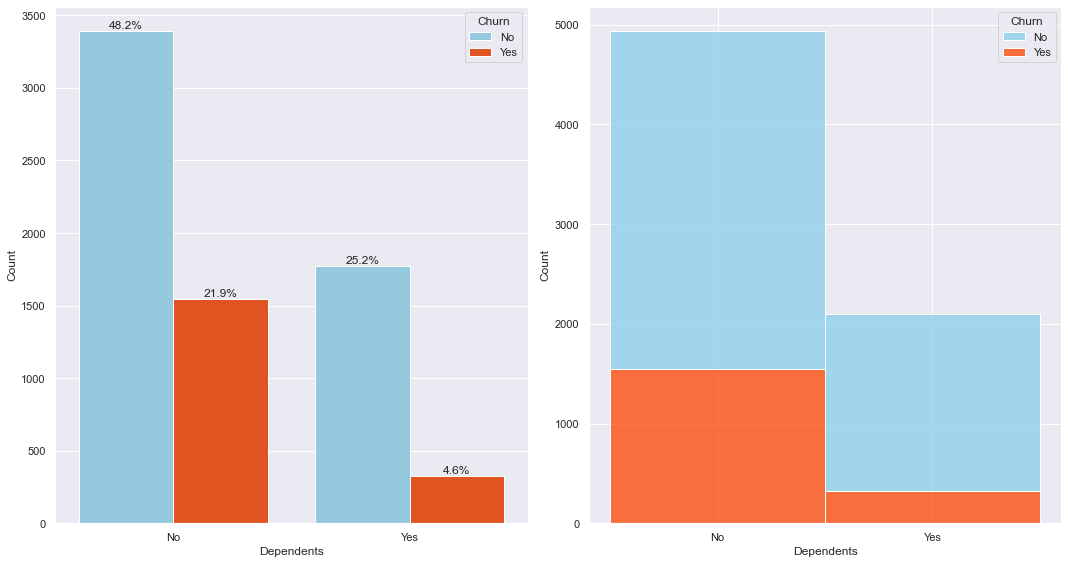

PhoneService


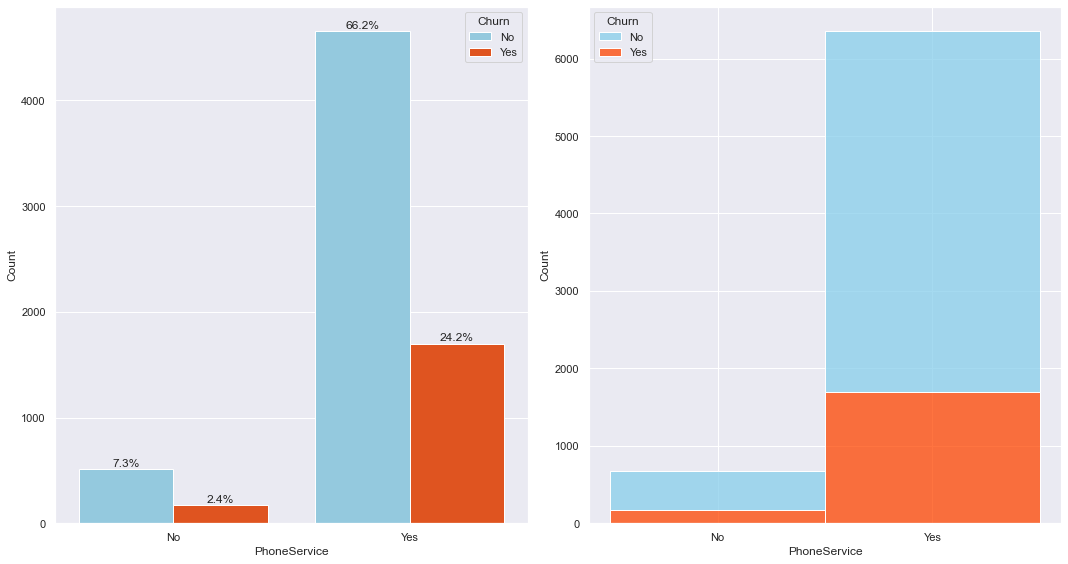

MultipleLines


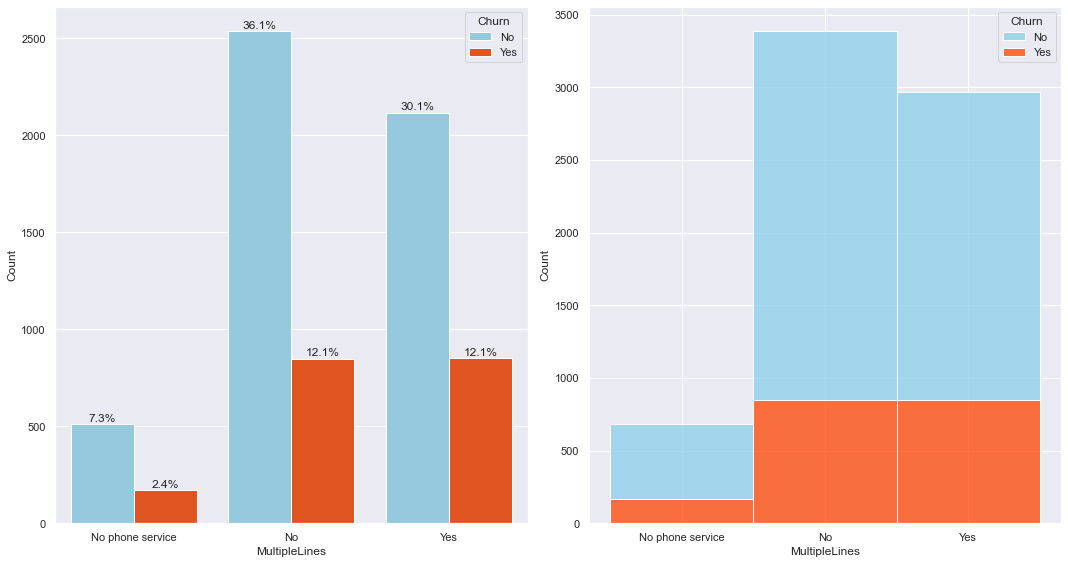

InternetService


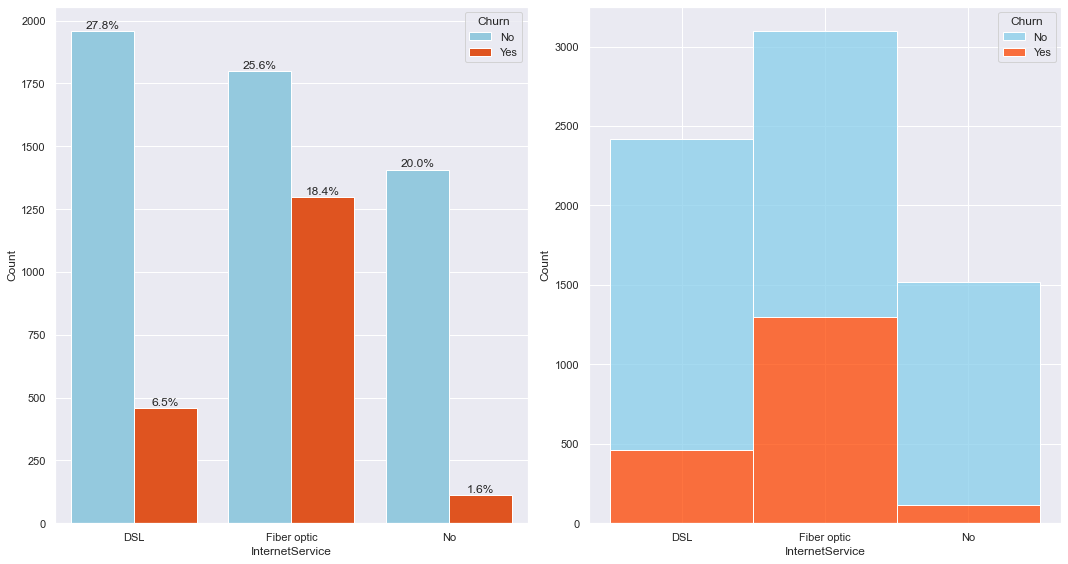

OnlineSecurity


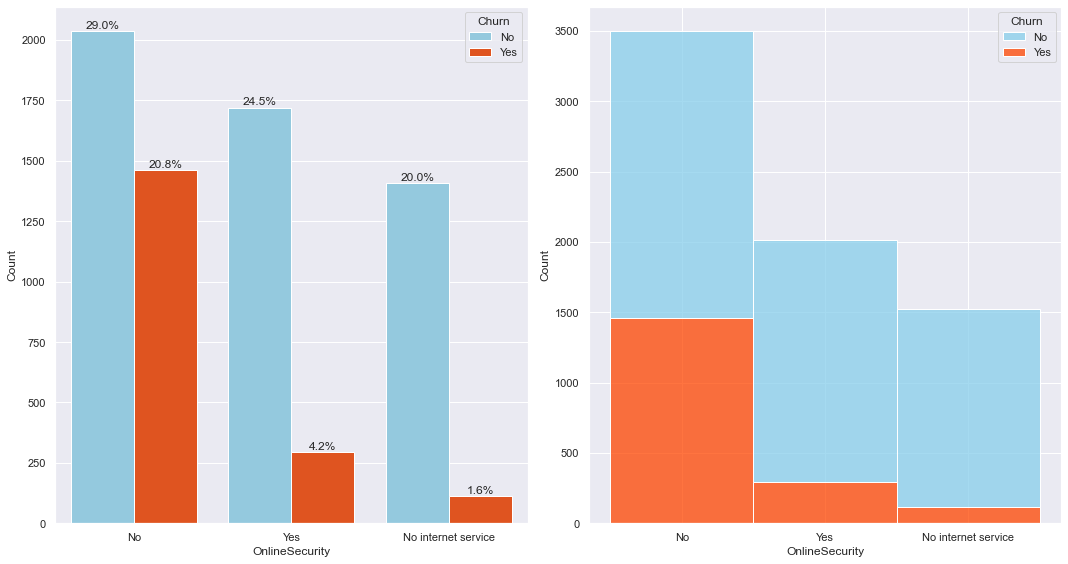

OnlineBackup


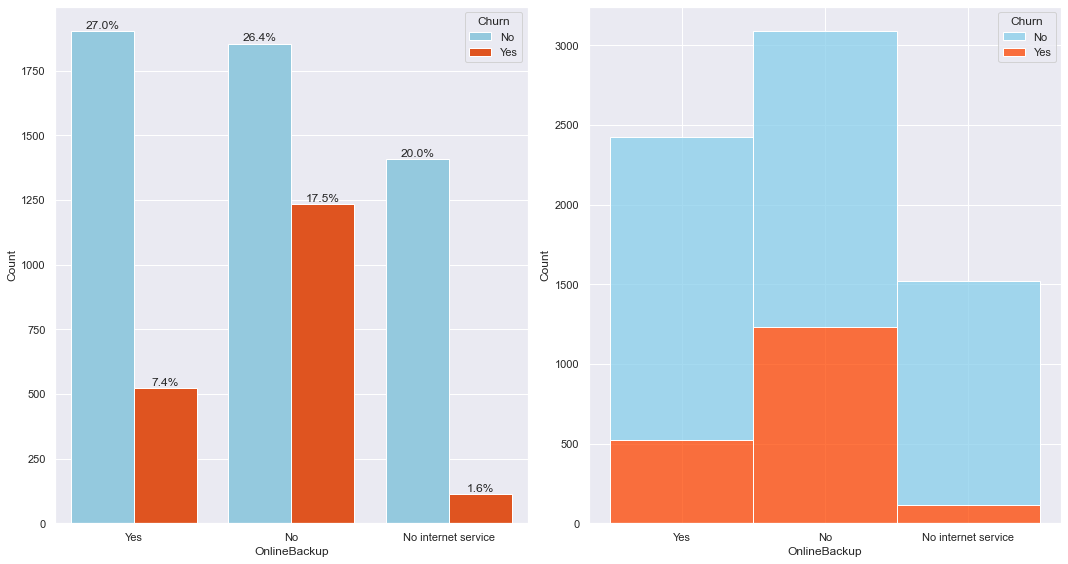

DeviceProtection


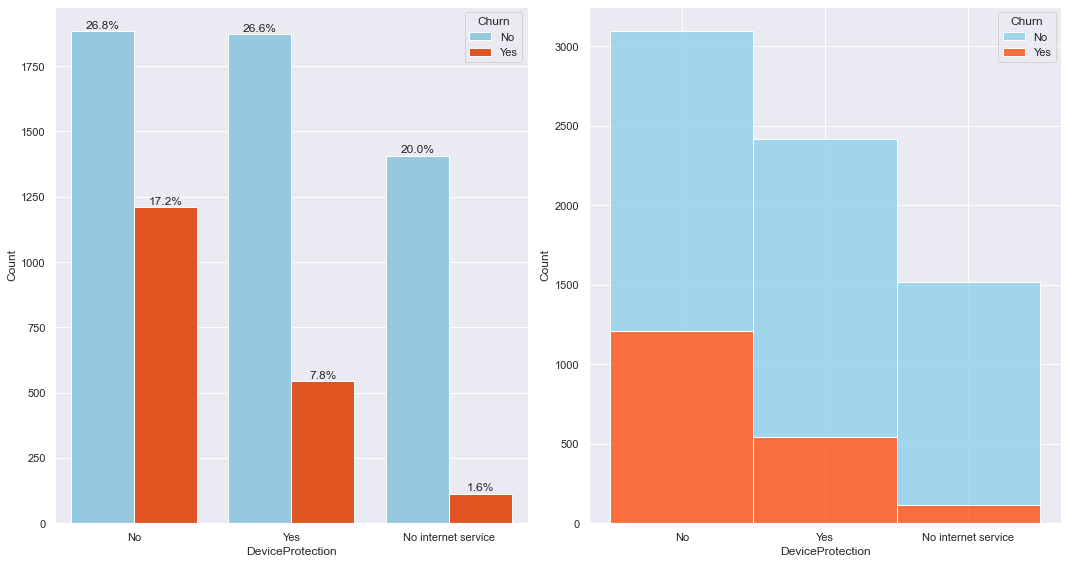

TechSupport


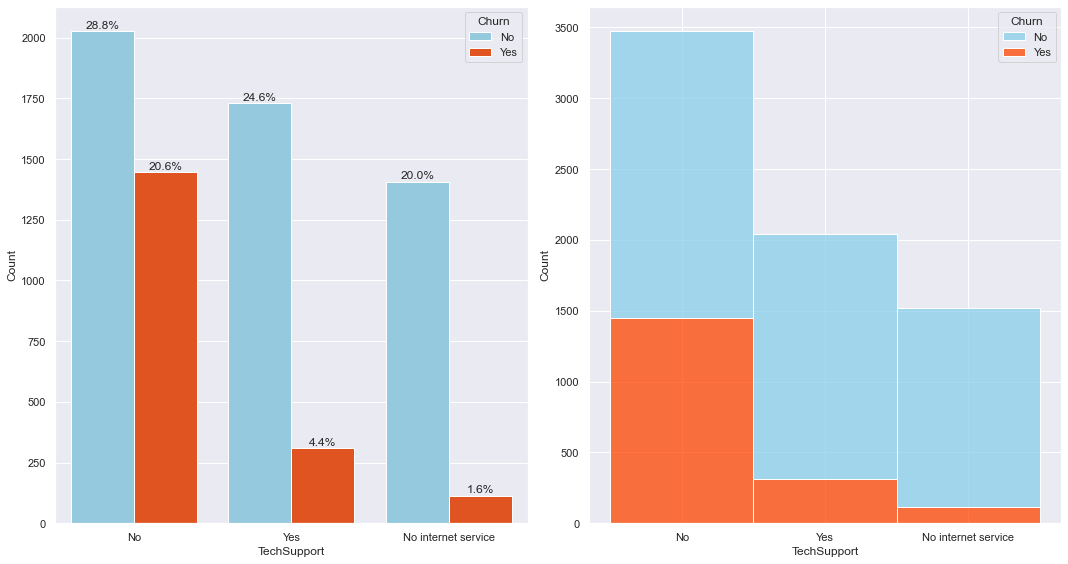

StreamingTV


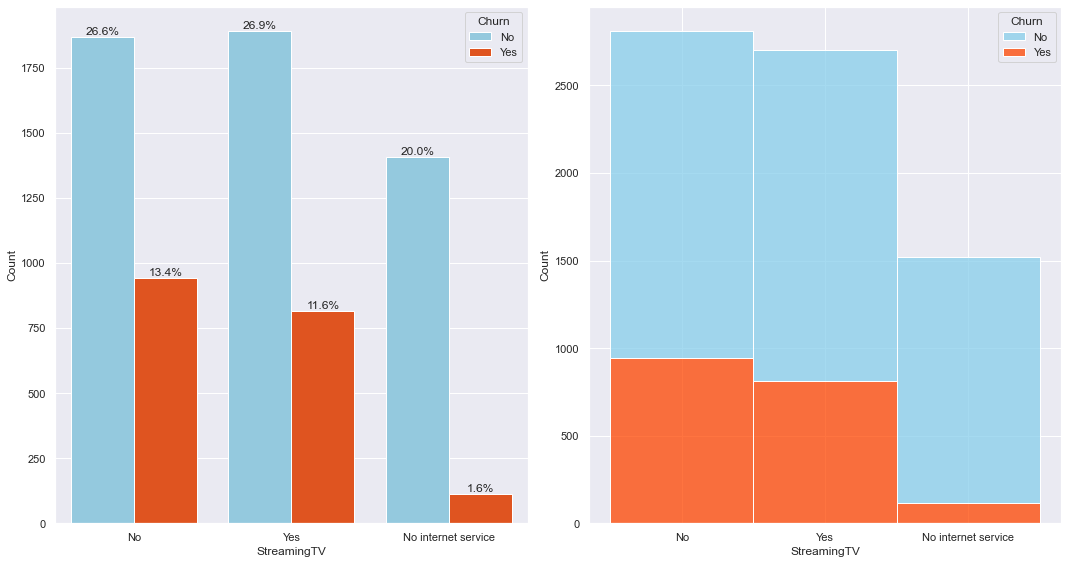

StreamingMovies


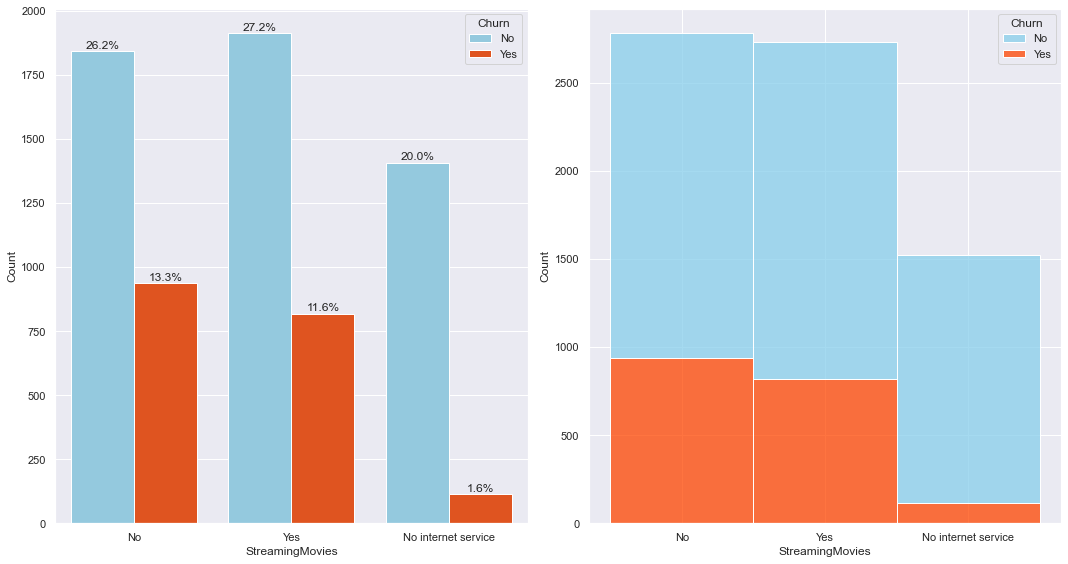

Contract


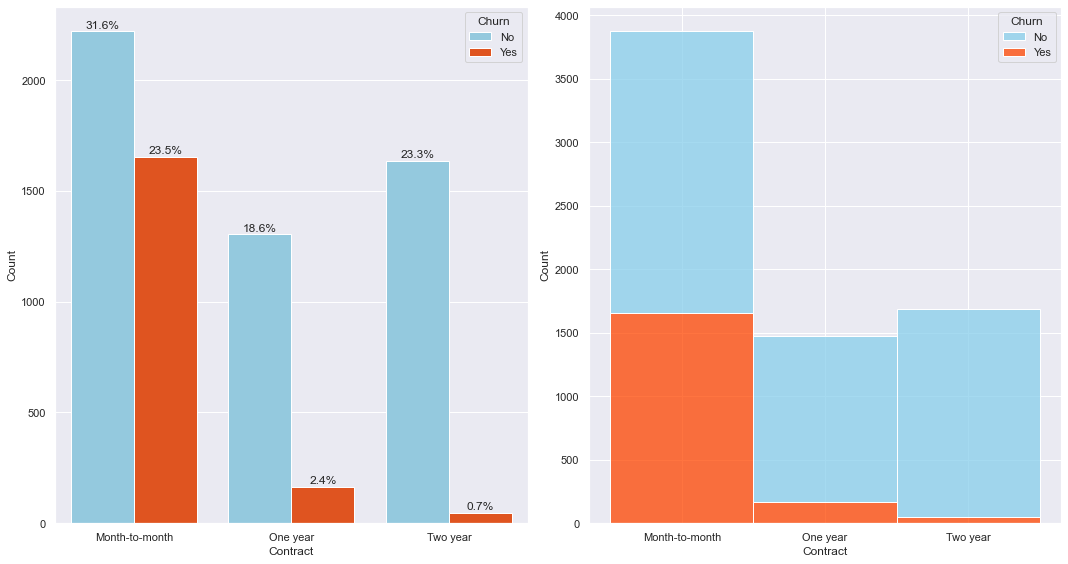

PaperlessBilling


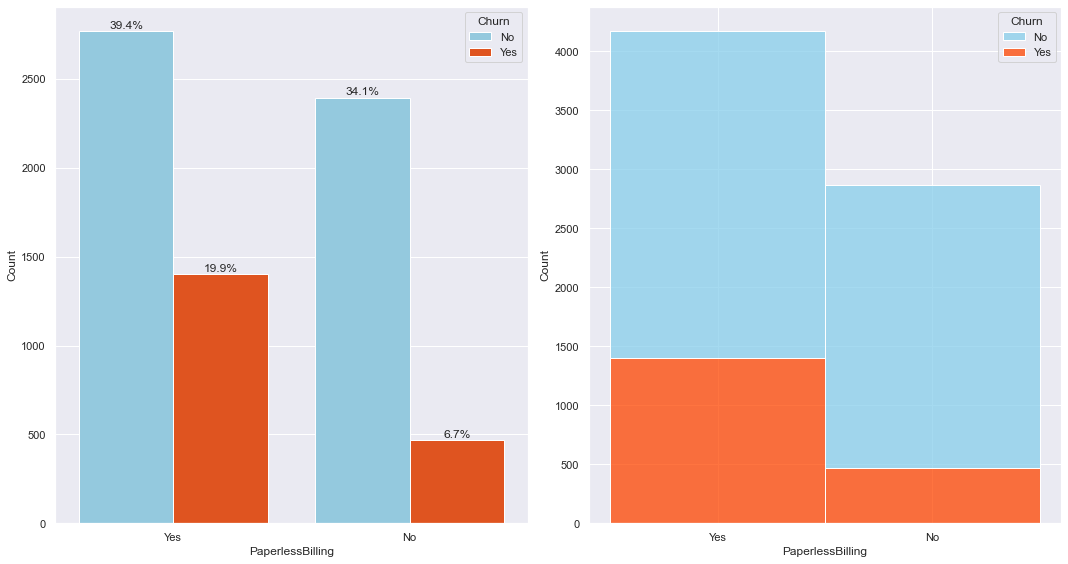

PaymentMethod


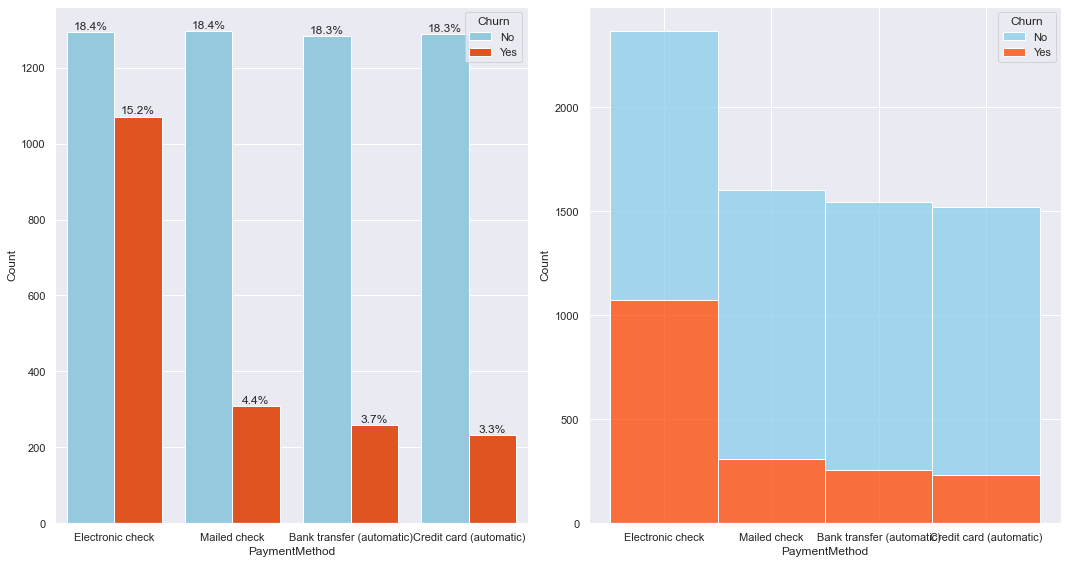

Churn


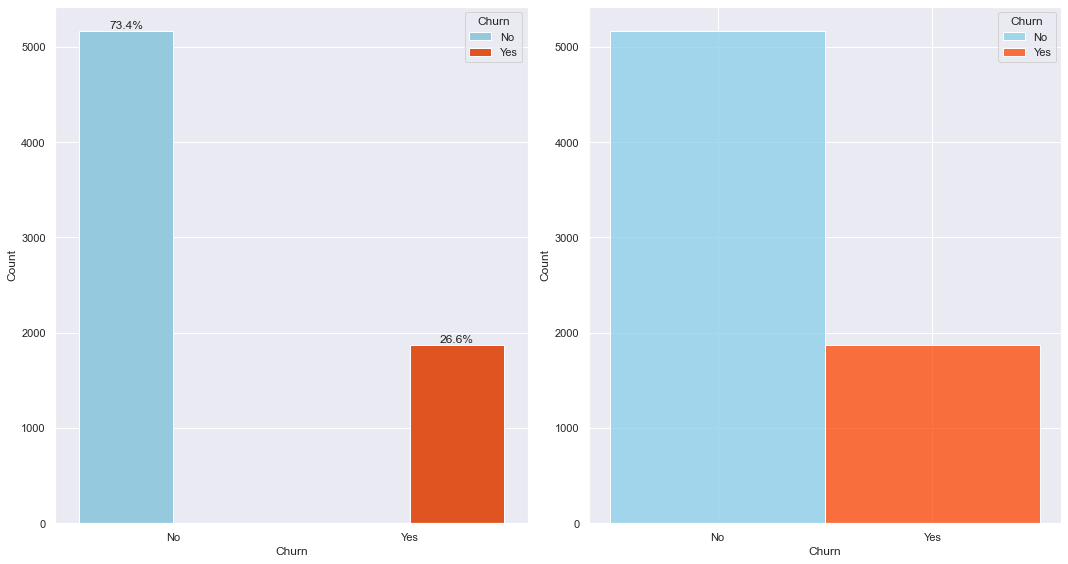

In [16]:
#plotting all the categorical independent variables with the target variable

target_var='Churn'
for var in str_vars:
    print(var)
    CategoricalDataAnalysisPlot(df,var,target_var)

In [17]:
#Function to plot all the continuous independent variables with the target variable


def ContinuousDataAnalysisPlot(df,var,target_var):
    fig, ax = plt.subplots(1,2)
    sns.set(rc = {'figure.figsize':(20,8)})
    sns.kdeplot(df[df[target_var]=='Yes'][var], shade=True, color="orangered", label="churned", ax=ax[0])
    sns.kdeplot(df[df[target_var]=='No'][var], shade=True, color="skyblue", label="not churned", ax=ax[0])

    ax[0].set_xlabel(var)
    ax[0].set_ylabel("Density")

    ax[0].legend();

    ax[1].hist(df[df[target_var]=='Yes'][var], bins=15, alpha=0.5, color="orangered", label="churned")
    ax[1].hist(df[df[target_var]=='No'][var],  bins=15, alpha=0.5, color="skyblue", label="not churned")

    ax[1].set_xlabel(var)
    ax[1].set_ylabel("Count")

    title='Churn vs. ' + var
    fig.suptitle(title);

    ax[1].legend();


tenure
MonthlyCharges
TotalCharges


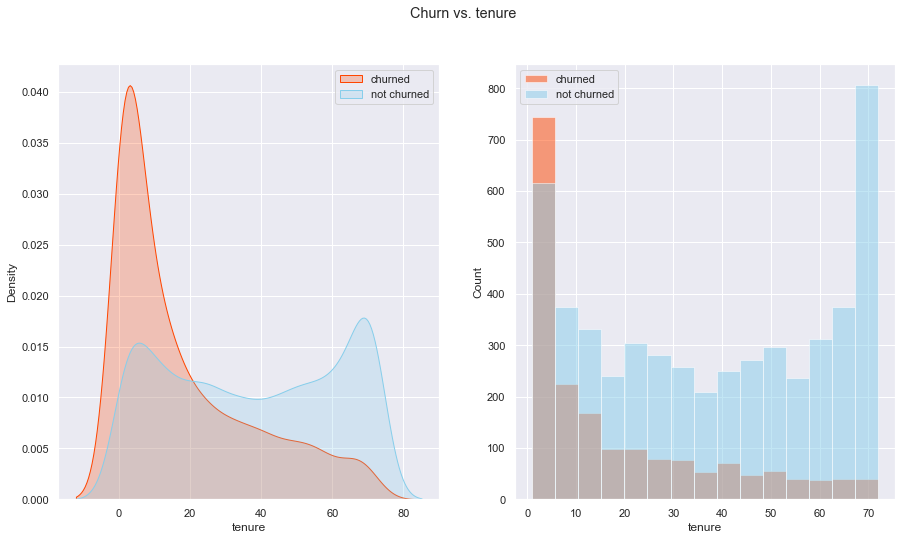

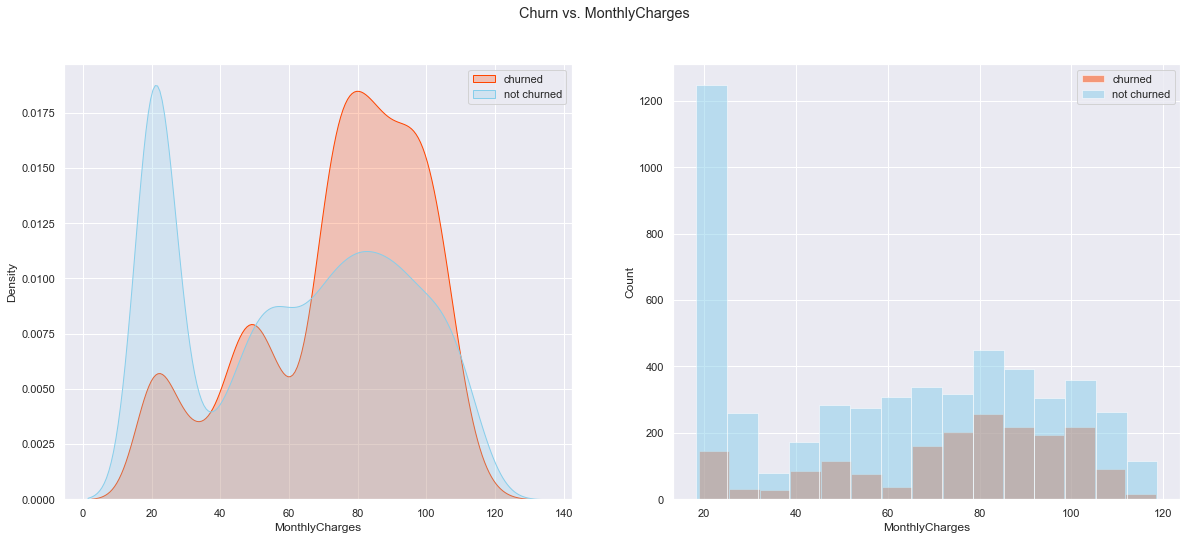

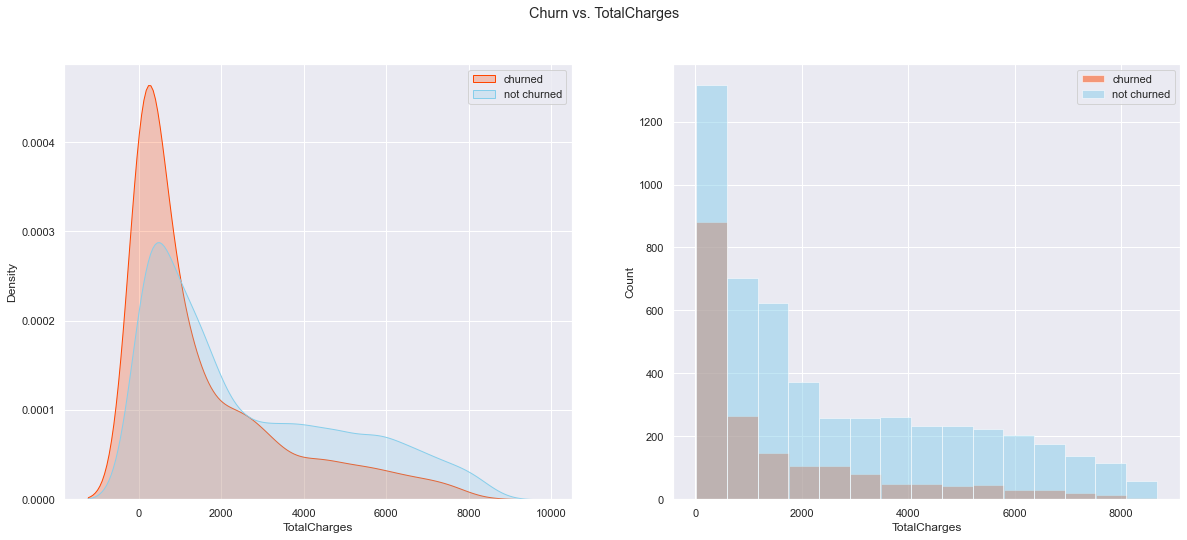

In [18]:
#plotting all the continuous independent variables with the target variable

target_var='Churn'
for var in num_vars:
    print(var)
    ContinuousDataAnalysisPlot(df,var,target_var)

In [19]:
df.corr()
#We observe that total chareges is positively correlated wiht tenure

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


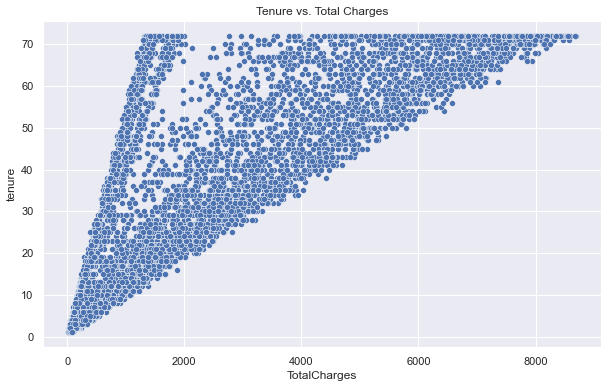

In [20]:
#Tenure vs. Total Charges is positively correlated
sns.set(rc = {'figure.figsize':(10,6)})
sns.scatterplot(x='TotalCharges', y='tenure', data=df)
plt.title('Tenure vs. Total Charges')
plt.show()

In [21]:
#Encoding the categorical data
labelencoder=LabelEncoder()
for column in df.columns:
    if column in str_vars:
        df[column] = labelencoder.fit_transform(df[column])
df.head()
df_merged=df

yes
yes
yes


In [22]:
df_merged.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [23]:
#Plotting the Correlation between the variables
df_merged.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


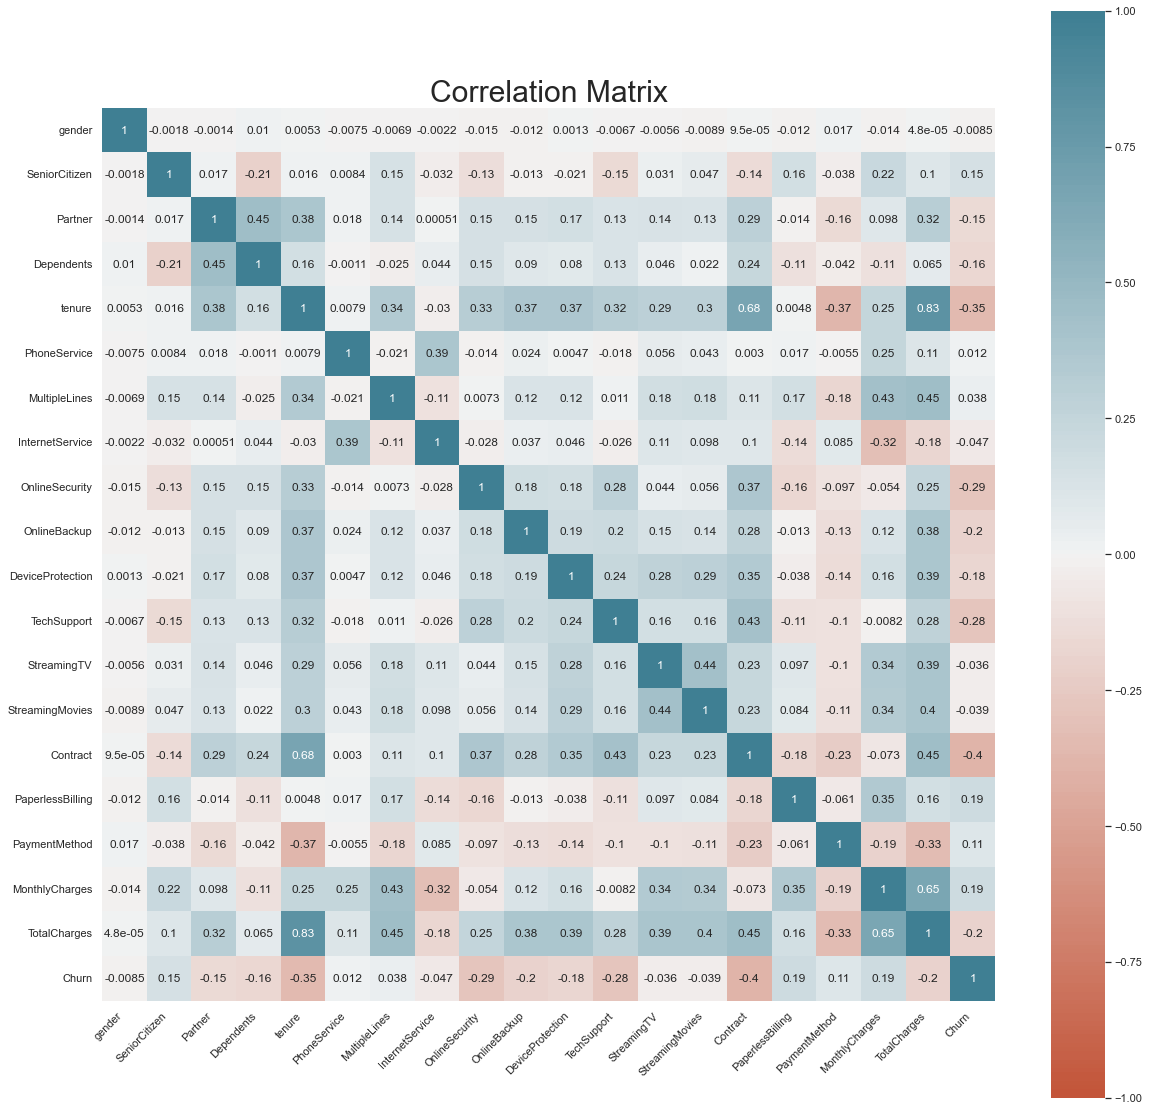

In [24]:
sns.set(rc = {'figure.figsize':(20,20)})
corr=df_merged.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Correlation Matrix",size=30)
plt.show()

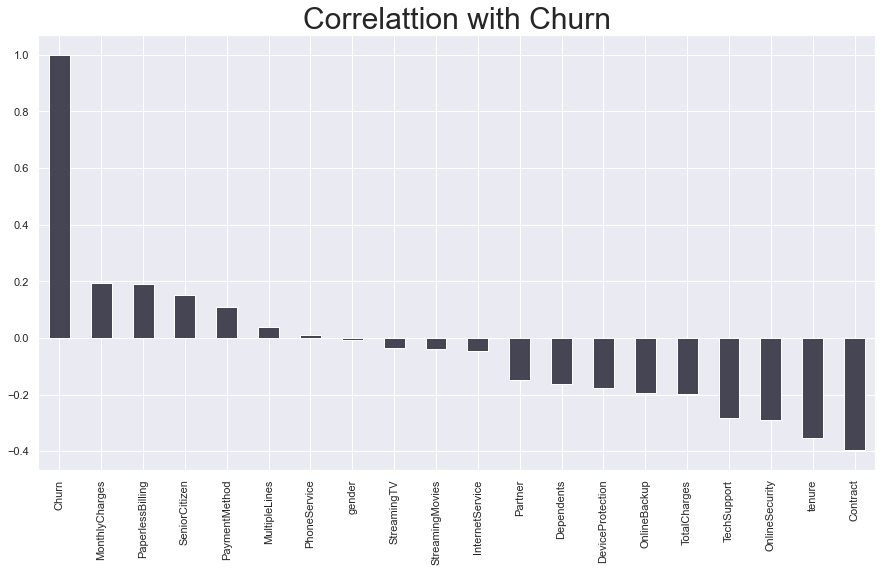

In [25]:

# Correlation with the target data
plt.figure(figsize=(15,8))
colors = ['#454553']

df_merged.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', color = colors)
plt.title("Correlattion with Churn",size=30)
plt.show()

In [26]:
x.columns
['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']==['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']

NameError: name 'x' is not defined

In [27]:
#splitiing train and test 80-20
y=df_merged['Churn']

#Selecting the features using forward selection

x=df_merged[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']]
#x=df_merged.copy()
#x=x.drop('Churn',axis=1)

#x=x.drop('StreamingMovies',axis=1)
#['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Dependents', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract']
#['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract']
#x=x.drop('PhoneService',axis=1)
#x=x.drop('MultipleLines',axis=1)
#x=x.drop('InternetService',axis=1)
#x=x.drop('PaperlessBilling',axis=1)
#x=x.drop('TotalCharges',axis=1)



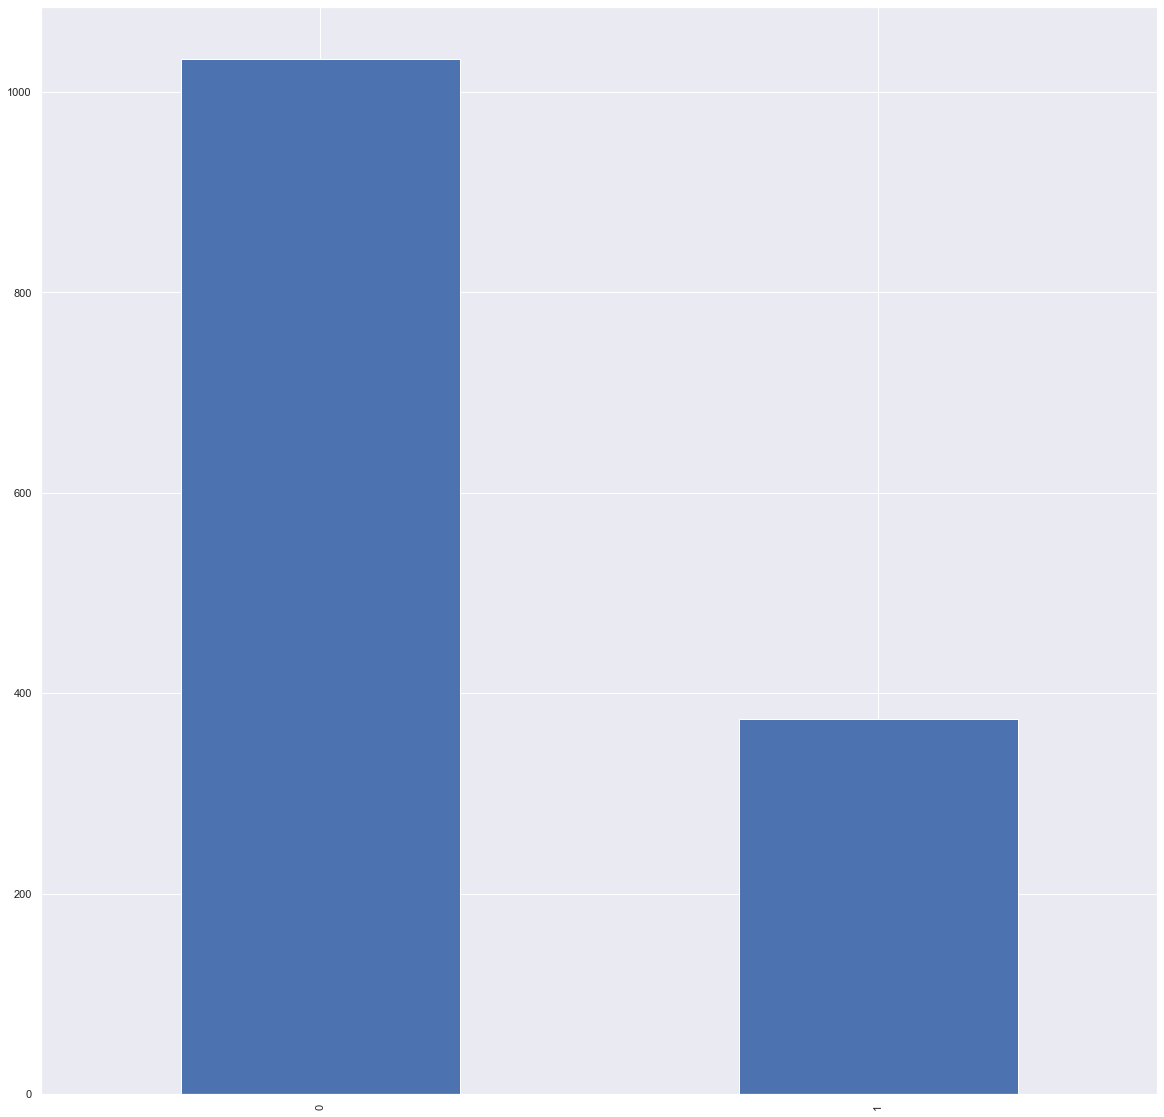

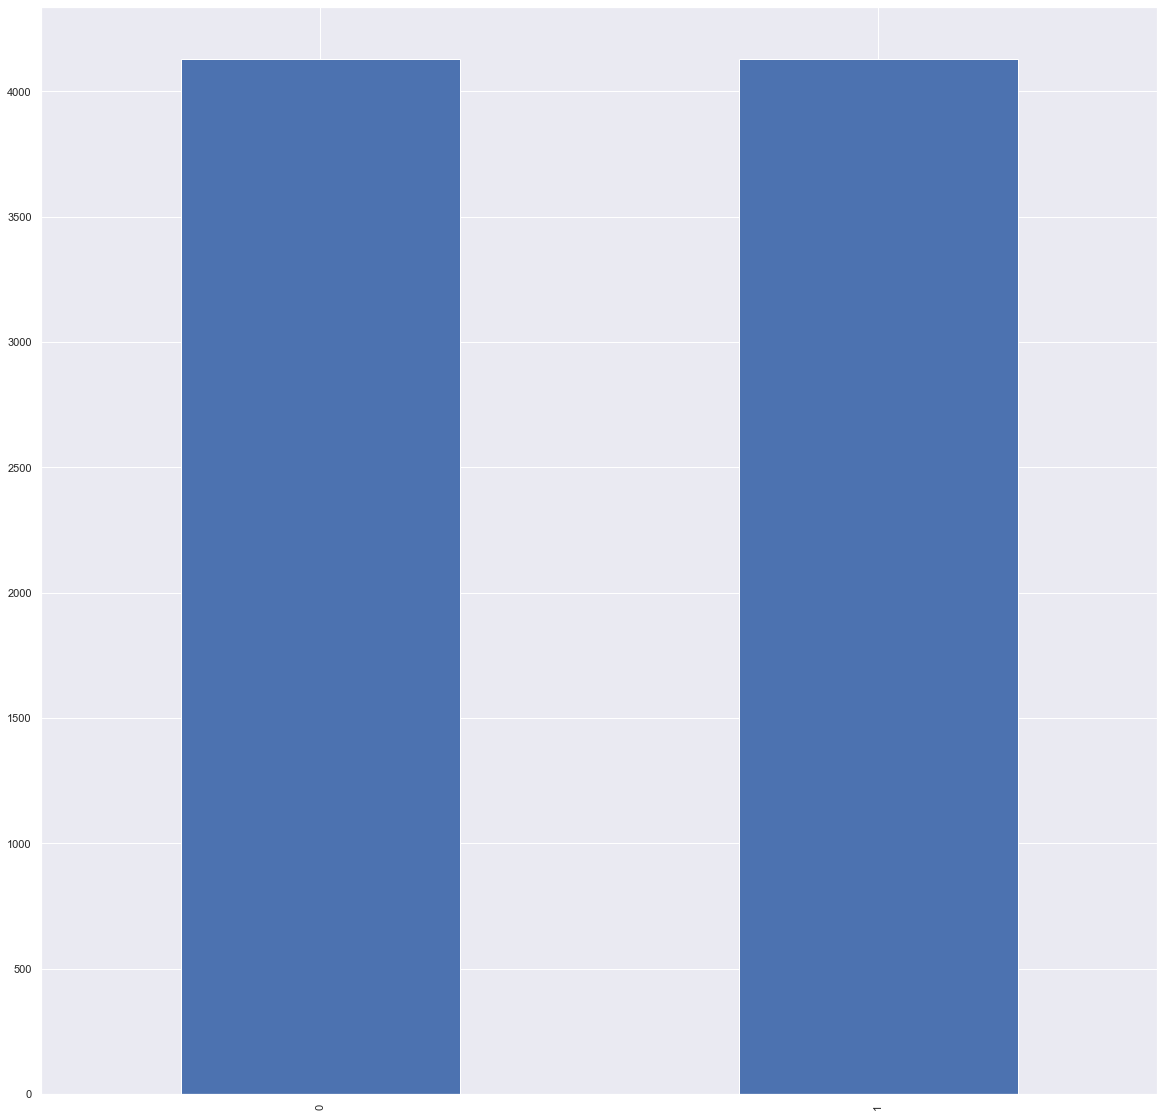

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, shuffle=True, random_state=1,stratify=y)
#Oversampling the data to make it balanced

from imblearn.over_sampling  import SMOTE
oversampled = SMOTE(random_state=0)
x_train, y_train = oversampled.fit_resample(x_train, y_train)

#x_train, y_train = sm.fit_resample(x_train, y_train)

#Visualisng the split
pd.Series(y_test).value_counts().plot.bar()
plt.show()
pd.Series(y_train).value_counts().plot.bar()
plt.show()



In [29]:
#Feature scaling the continuous variables
#num_vars=['tenure','MonthlyCharges','TotalCharges']
num_vars=['tenure']
df_con_x_train=x_train[num_vars]
df_con_x_test=x_test[num_vars]

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

df_con_x_train = sc_x.fit_transform(df_con_x_train)
df_con_x_test = sc_x.transform(df_con_x_test)
df_con_x_train=pd.DataFrame(df_con_x_train)
df_con_x_test=pd.DataFrame(df_con_x_test)
i=0
for var in num_vars:
    x_train[var]=df_con_x_train[i].values
    x_test[var]=df_con_x_test[i].values
    i=i+1
print(x_train[num_vars].head(5))
print(x_test[num_vars].head(5))

     tenure
0  1.183196
1  1.808896
2  1.600330
3 -1.111041
4  0.140361
        tenure
6904  1.516903
2209 -0.819047
2910  0.307215
3854  0.932915
6385 -0.985900


In [30]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import GradientBoostingClassifier 
CV = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
sfs1 = sfs(tree.DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8),
          k_features = 12,
          forward= True,
          floating = False,
          verbose= 2,
          scoring = 'accuracy',
          cv = CV,
          n_jobs= -1).fit(x_train, y_train)


feat_cols = list(sfs1.k_feature_names_)
print(feat_cols)

NameError: name 'tree' is not defined

In [31]:
#Cross Validation Function 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
sns.set(rc = {'figure.figsize':(8,8)})



def KFoldCrossValidation(model,x,y):
    kfold = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
    results = cross_val_score(model, x, y, cv=kfold)
    # Output the accuracy. Calculate the mean and std across all folds. 
    print("Cross Validation Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
    print("K Fold Cross Validation")
    plot_precision_recall_curve(model, x, y)
    plt.show()
    return results.mean()*100.0

In [84]:
#Ultimate Model Report Function

def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precisionscore    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    y_score      = model.predict_proba(testing_x)[:, 1]
    
    predictions2  = model.predict(training_x)
    accuracy2     = accuracy_score(training_y,predictions2)
    recallscore2  = recall_score(training_y,predictions2)
    precisionscore2    = precision_score(training_y,predictions2)
    roc_auc2      = roc_auc_score(training_y,predictions2)
    f1score2      = f1_score(training_y,predictions2) 
    kappa_metric2 = cohen_kappa_score(training_y,predictions2)
    
    
    # Plotting Confusion Matrix
    unique_label = np.unique([testing_y, predictions])
    
    cmtx = pd.DataFrame(
    confusion_matrix(testing_y, predictions,labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
    )
    cv_accuracy=KFoldCrossValidation(model,x,y)
    cm = confusion_matrix(testing_y, predictions,labels=unique_label)
    print(cmtx)
    sns.heatmap(cm,cmap="GnBu",square=True,annot=True,
                    xticklabels=["not churn","churn"],
                    yticklabels=["not churn","churn"],
                    linewidths = 6,linecolor = "w")
    plt.title(name)
    plt.show()
    
    precision, recall, thresholds = precision_recall_curve(testing_y, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()
    
    


    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precisionscore],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                       "Cross Validation Accuracy"    : [cv_accuracy],
                       "Accuracy_score2"  : [accuracy2],
                       "Recall_score2"    : [recallscore2],
                       "Precision2"       : [precisionscore2],
                       "f1_score2"        : [f1score2],
                       "Area_under_curve2": [roc_auc2],
                       "Kappa_metric2"    : [kappa_metric2]
                      })
    return df

Logistic Regression
Cross Validation Accuracy: 78.996% (0.888%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


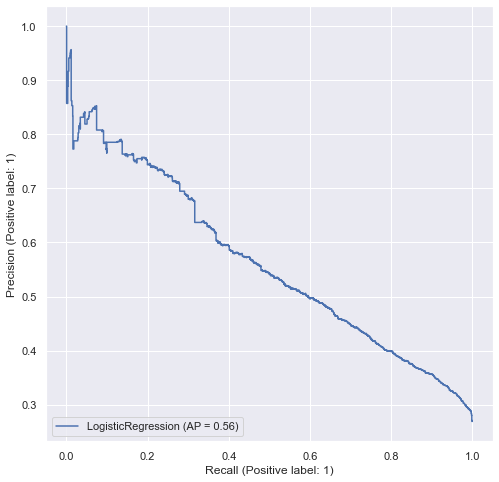

        pred:0  pred:1
true:0     697     336
true:1      77     297


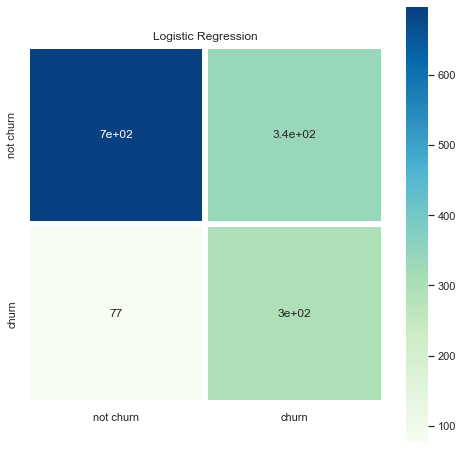

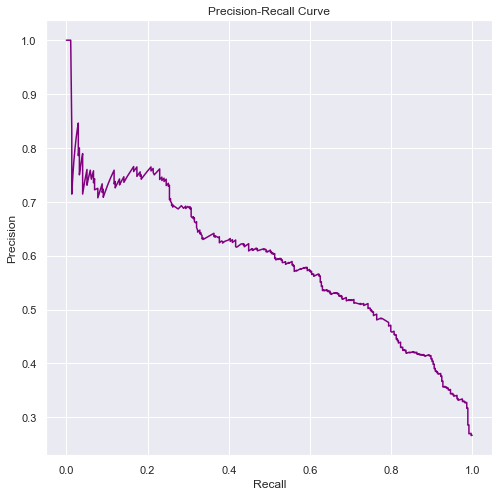

AxesSubplot(0.125,0.125;0.775x0.755)
0.7673123486682809


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,Logistic Regression,0.706468,0.794118,0.469194,0.589871,0.734426,0.384023,78.995886,0.767312,0.856659,0.726787,0.786397,0.767312,0.534625


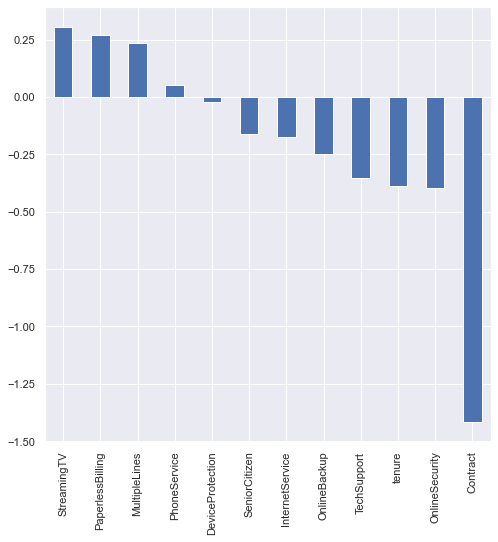

In [83]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression")
model = LogisticRegression(solver='liblinear',C=100.0, penalty='l1',random_state = 0)
model.fit(x_train,y_train)
y_pred = model.predict(x_train)
accuracy     = accuracy_score(y_train,y_pred)
metric1 = model_report(model,x_train,x_test,y_train,y_test,
                      "Logistic Regression")
print(accuracy)
metric1
#['SeniorCitizen', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

Cross Validation Accuracy: 79.166% (1.308%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


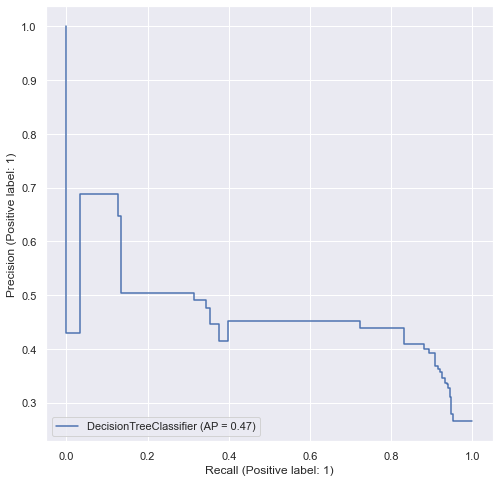

        pred:0  pred:1
true:0     710     323
true:1      80     294


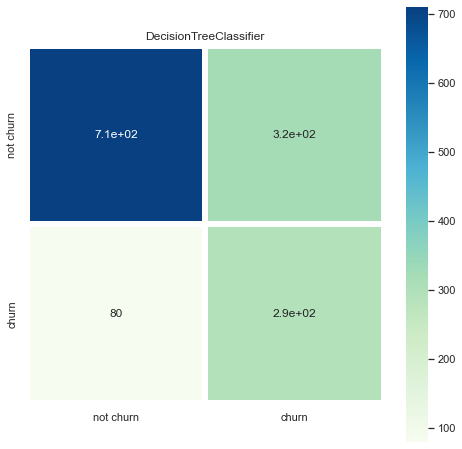

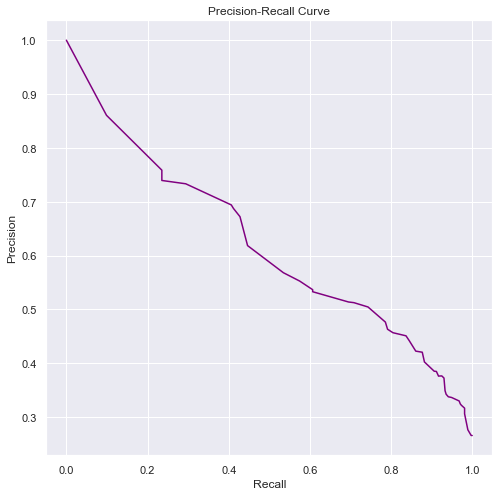

0.7797820823244552


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,DecisionTreeClassifier,0.713575,0.786096,0.476499,0.59334,0.736707,0.392144,79.166291,0.779782,0.861985,0.740279,0.79651,0.779782,0.559564


In [85]:
from sklearn import tree
model = tree.DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,max_features='auto', random_state=1024)
metric2 = model_report(model,x_train,x_test,y_train,y_test,
                      "DecisionTreeClassifier")
model.fit(x_train,y_train)
y_pred = model.predict(x_train)
accuracy     = accuracy_score(y_train,y_pred)
print(accuracy)
metric2

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Cross Validation Accuracy: 79.949% (0.901%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


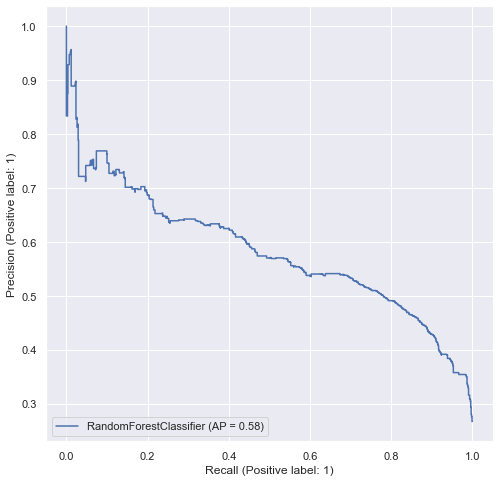

        pred:0  pred:1
true:0     769     264
true:1      93     281


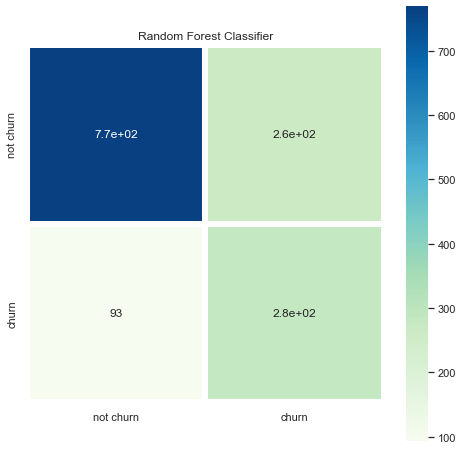

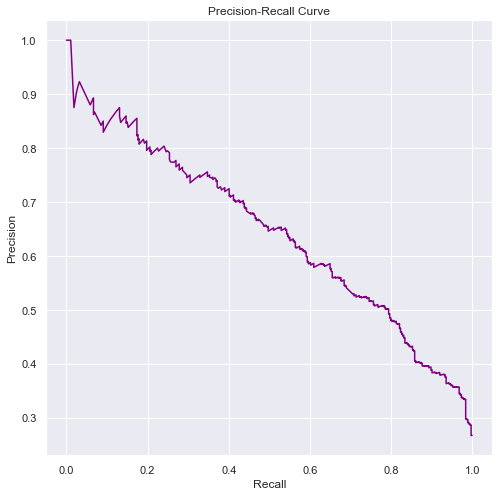

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,Random Forest Classifier,0.746269,0.751337,0.515596,0.611534,0.747885,0.43267,79.94855,0.851574,0.918402,0.810124,0.860872,0.851574,0.703148


In [87]:
model = RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200, random_state=123)
metric3 = model_report(model,x_train,x_test,y_train,y_test,
                      "Random Forest Classifier")
metric3

#['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'TotalCharges']

Cross Validation Accuracy: 80.276% (0.997%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


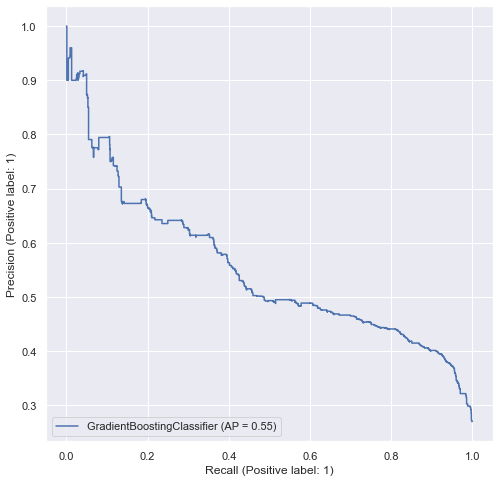

        pred:0  pred:1
true:0     755     278
true:1      90     284


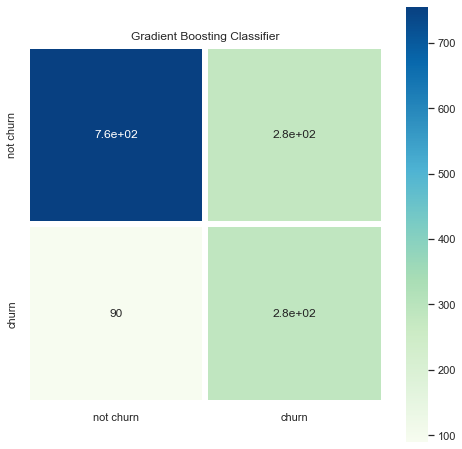

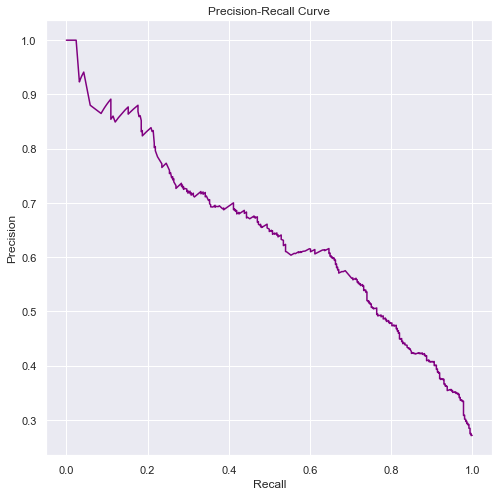

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,Gradient Boosting Classifier,0.738451,0.759358,0.505338,0.606838,0.74512,0.422496,80.275756,0.808475,0.873608,0.772922,0.820186,0.808475,0.616949


In [36]:
from sklearn.ensemble import GradientBoostingClassifier 
model=GradientBoostingClassifier(n_estimators=100, random_state=0)
metric4 = model_report(model,x_train,x_test,y_train,y_test,
                      "Gradient Boosting Classifier")
metric4
#0.761905	0.695187	0.540541	0.608187	0.740624	0.441003	79.777903

Cross Validation Accuracy: 76.863% (0.627%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


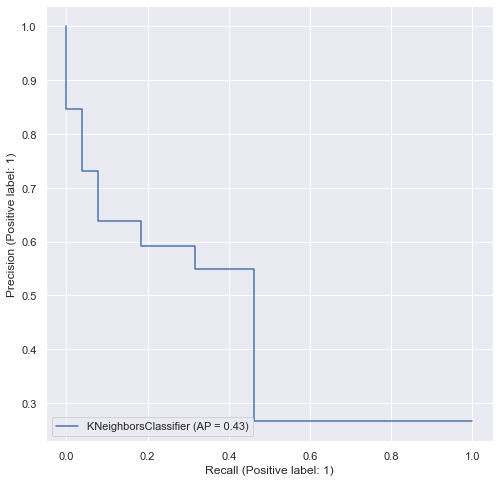

        pred:0  pred:1
true:0     787     246
true:1     140     234


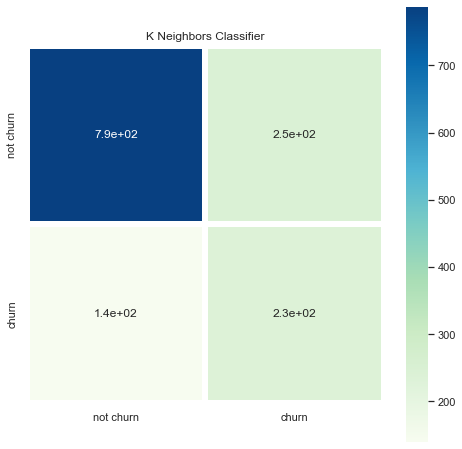

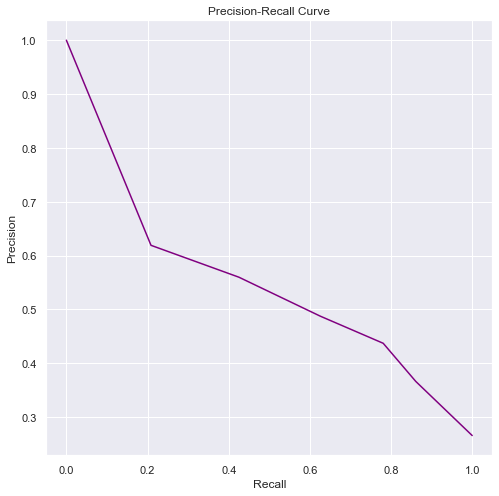

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,K Neighbors Classifier,0.725657,0.625668,0.4875,0.548009,0.693764,0.355398,76.862798,0.836804,0.826392,0.843966,0.835087,0.836804,0.673608


In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
metric5= model_report(model,x_train,x_test,y_train,y_test,
                      "K Neighbors Classifier")
metric5

Cross Validation Accuracy: 78.768% (0.858%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


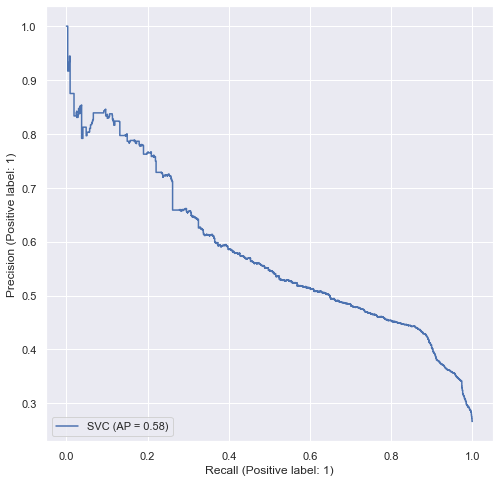

        pred:0  pred:1
true:0     578     455
true:1      50     324


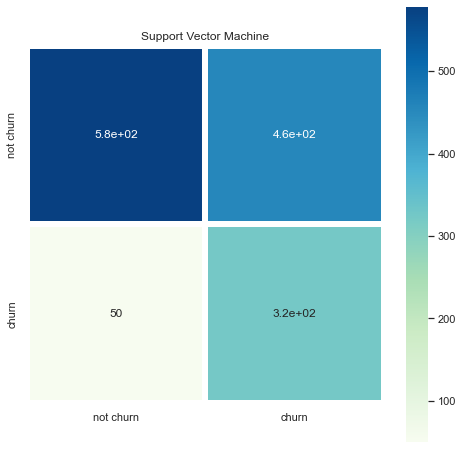

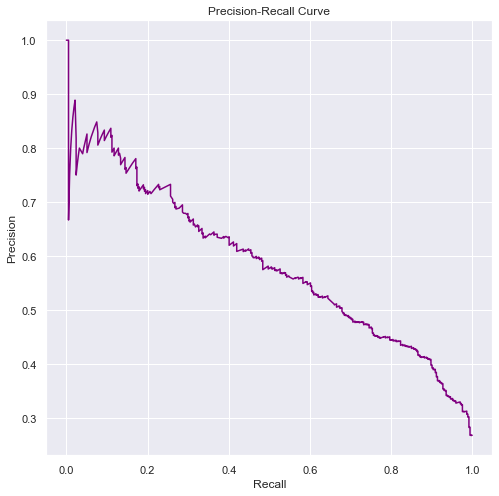

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,Support Vector Machine,0.64108,0.86631,0.415918,0.562012,0.712923,0.316517,78.768338,0.747942,0.923245,0.683578,0.785538,0.747942,0.495884


In [46]:
from sklearn.svm import SVC

#Support vector classifier
#using linear hyper plane
model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
metric6= model_report(model,x_train,x_test,y_train,y_test,
                      "Support Vector Machine")
metric6

Cross Validation Accuracy: 80.304% (1.231%)
K Fold Cross Validation


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


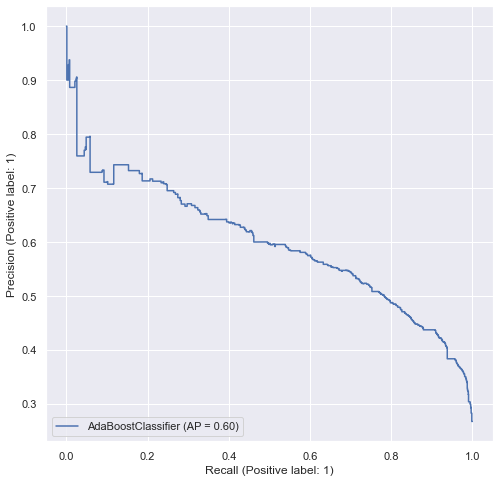

        pred:0  pred:1
true:0     720     313
true:1      81     293


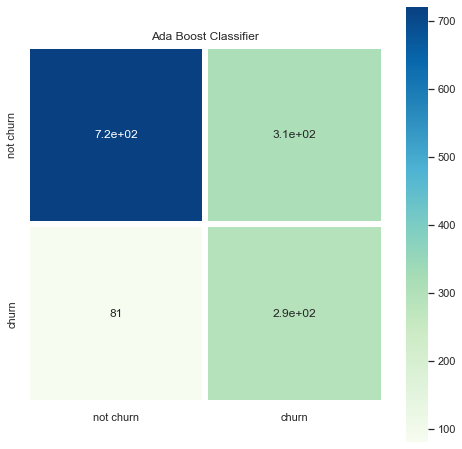

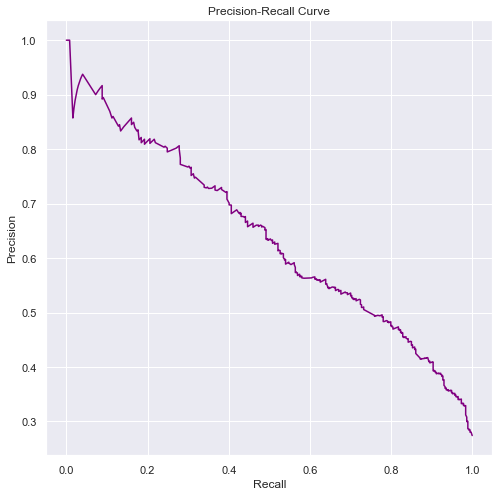

,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
0,Ada Boost Classifier,0.719972,0.783422,0.483498,0.597959,0.740211,0.401064,80.304227,0.783535,0.856174,0.747569,0.798194,0.783535,0.56707


In [90]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
metric7= model_report(model,x_train,x_test,y_train,y_test,
                      "Ada Boost Classifier")
metric7

In [94]:
model_performances=pd.concat([metric1,metric2,metric3,metric4,metric5,metric6,metric7],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
model_performances.sort_values(by=['Cross Validation Accuracy'],ascending=[False])


,Model,Accuracy_score,Recall_score,Precision,f1_score,Area_under_curve,Kappa_metric,Cross Validation Accuracy,Accuracy_score2,Recall_score2,Precision2,f1_score2,Area_under_curve2,Kappa_metric2
6,Ada Boost Classifier,0.719972,0.783422,0.483498,0.597959,0.740211,0.401064,80.304227,0.783535,0.856174,0.747569,0.798194,0.783535,0.567070
3,Gradient Boosting Classifier,0.738451,0.759358,0.505338,0.606838,0.745120,0.422496,80.275756,0.808475,0.873608,0.772922,0.820186,0.808475,0.616949
2,Random Forest Classifier,0.746269,0.751337,0.515596,0.611534,0.747885,0.432670,79.948550,0.851574,0.918402,0.810124,0.860872,0.851574,0.703148
1,DecisionTreeClassifier,0.713575,0.786096,0.476499,0.593340,0.736707,0.392144,79.166291,0.779782,0.861985,0.740279,0.796510,0.779782,0.559564
0,Logistic Regression,0.706468,0.794118,0.469194,0.589871,0.734426,0.384023,78.995886,0.767312,0.856659,0.726787,0.786397,0.767312,0.534625
5,Support Vector Machine,0.641080,0.866310,0.415918,0.562012,0.712923,0.316517,78.768338,0.747942,0.923245,0.683578,0.785538,0.747942,0.495884
4,K Neighbors Classifier,0.725657,0.625668,0.487500,0.548009,0.693764,0.355398,76.862798,0.836804,0.826392,0.843966,0.835087,0.836804,0.673608


We Observe that Ada Boost performs the best, therefore we select Ada Boost as our classifier

From the data we want a higher recall as compared to higher precision, Hence we select a model with highest accuracy and recall.


<H3> Hyper Tuning <H3>

In [75]:
from sklearn.model_selection import GridSearchCV

lr=LogisticRegression(solver='liblinear',random_state = 0)
grid = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}
lr_cv = GridSearchCV(lr, grid, cv=10)
lr_cv.fit(x_train, y_train)

print('best paremeters for logistic regression: ', lr_cv.best_params_)
print('best score for logistic regression after grid search cv:', lr_cv.best_score_)

best paremeters for logistic regression:  {'C': 10.0, 'penalty': 'l2'}
best score for logistic regression after grid search cv: 0.7676755447941889


In [76]:
final_model = lr_cv.best_estimator_
final_model

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = tree.DecisionTreeClassifier(random_state=1024)
lr_cv = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
lr_cv.fit(x_train, y_train)
print('best paremeters for logistic regression: ', lr_cv.best_params_)
print('best score for logistic regression after grid search cv:', lr_cv.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users

best paremeters for logistic regression:  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}
best score for logistic regression after grid search cv: 0.774455205811138


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [56]:
final_model = lr_cv.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=1024)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [63]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
tree_clas = RandomForestClassifier(n_estimators = 100, random_state = 123)
lr_cv = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
lr_cv.fit(x_train, y_train)
print('best paremeters for logistic regression: ', lr_cv.best_params_)
print('best score for logistic regression after grid search cv:', lr_cv.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

best paremeters for logistic regression:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
best score for logistic regression after grid search cv: 0.8014527845036319


In [64]:
final_model = lr_cv.best_estimator_
final_model

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=200,
                       random_state=123)